In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import json

def get_auc(fp):
   
    data_dict = {}
    keys = ["train_loss", 'train_cls', 'train_c0', 'train_c1', 'train_c2',  'train_patch', 'epoch']
    for key in keys:
        data_dict[key] = []
   
    if os.path.exists(fp):

        with open(fp, "r") as file:
            for line in file:
                data = json.loads(line)
                for key in keys:
                    if key in data:
                        data_dict[key].append(data[key])
                           
        l_train = np.array(data_dict['train_loss'])
        l_c0 = np.array(data_dict['train_c0'])
        l_c1 = np.array(data_dict['train_c1'])
        l_c2 = np.array(data_dict['train_c2'])
        l_cls = np.array(data_dict['train_cls'])
        ep = np.array(data_dict['epoch']) +1


       
    else:
        print(fp, 'no file!!!!')
        l_train = np.array([0.0])
        l_cls = np.array([0.0])
        ep = np.array([0.0])

           
   
    return l_train, l_c0, l_c1, l_c2, l_train - l_cls, ep


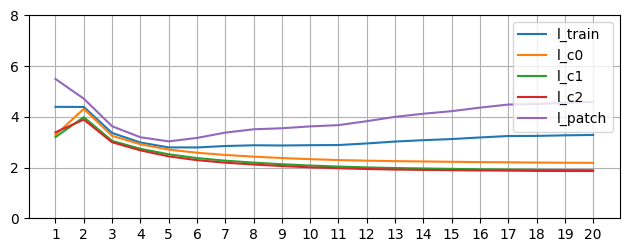

In [5]:
files = [
    # '/vol/research/fmodel_medical/people/umar/ibot/out_nolocal/log.txt',
'/vol/research/fmodel_medical/people/umar/ibot/outputs_patch32/log.txt']

plt.figure()

for i,f in enumerate(files):
    l_train, l_c0, l_c1, l_c2, l_patch, ep = get_auc(f)
    plt.subplot(2,1,i+1)
    plt.plot(ep, l_train/2, label='l_train')
    plt.plot(ep, l_c0, label='l_c0')
    plt.plot(ep, l_c1, label='l_c1')
    plt.plot(ep, l_c2, label='l_c2')
    plt.plot(ep, l_patch, label='l_patch')
    plt.xticks(ep)
    plt.legend()
    plt.ylim([0, 8])
    plt.grid()

plt.tight_layout()
plt.show()
